In [1]:
%matplotlib notebook
%pylab
from scipy.fft import fft, ifft

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


# 1. (Spectral differentiation)

# a)

In [2]:
#function u(t)
def u(t):
        return (exp(cos(5*(t-0.1))))    

def uprime(uj,N):
    '''
    Arguments
    ---------
    N: Total number of iterations
    uj: Samples of u(t) at j=0,1,...,N
    
    Return
    ------
    uprim: real part of the inverse fast fourier tansform of dk
    '''
    #apply fft
    ucap=fft(uj)
    n=int((N-1)/2)
    #computing dk, j is complex
    dk1=[]
    dk2=[]
    for k in range(0,n+1):
        dk_1=j*k*ucap[k]
        dk1.append(dk_1)
    for k in range(-n,0):
        dk_2=j*k*ucap[k]
        dk2.append(dk_2)
        
    dk=dk1 + dk2
    uprim=real(ifft(dk))
    return uprim

# b)

# Using N=63

In [3]:
N=63
tj6=zeros(N)
for j in range(N): #for N odd
    tj6[j]=(2*pi*j)/N
    
uj6=u(tj6)
up63=uprime(uj6,N)
print('Derivatives of u for N=63; \n',up63)


Derivatives of u for N=63; 
 [ 0.00000000e+00 -3.60866539e-15  6.31593543e-14 -3.60910596e-15
  2.70683129e-14 -1.44363285e-14 -2.34591887e-14 -2.88733064e-14
 -2.52638371e-14 -8.43104723e-15 -9.11854707e-15  1.04925271e-14
  5.78055075e-15 -2.58122714e-15  8.06537512e-15  4.02579294e-14
  1.49068716e-14 -4.16863997e-14  1.33009658e-14  4.26662212e-15
 -5.61338824e-14 -2.34037662e-14 -3.91931414e-14 -3.92958928e-17
  2.03578888e-14 -1.87652639e-14  3.62120408e-14  1.44187154e-14
  8.98496269e-15  1.50157260e-14  1.44863539e-14  2.93853640e-14
  4.29063870e-15 -6.83658983e-14  1.72336611e-14  2.29386014e-14
 -1.44187154e-14 -2.48069734e-15  5.70312639e-14  1.64437694e-14
  4.36828371e-15 -2.22923740e-14  2.75041507e-14 -4.38495255e-15
 -6.54460285e-14 -1.33009658e-14 -2.65953773e-15 -3.81162005e-14
 -1.90054935e-14 -9.58220386e-15  2.60530235e-14  3.53665648e-14
 -1.72395057e-14  1.42086390e-14  8.43104723e-15  4.61894668e-15
 -5.14487884e-14  9.30769158e-15 -9.46526093e-15 -1.64037132e

# Using N=127

In [4]:
N=127
tj1=zeros(N)
for j in range(N): #for N odd
    tj1[j]=(2*pi*j)/N
    
uj1=u(tj1)
up127=uprime(uj1,N)
print('Derivatives of u for N=127; \n',up127)

Derivatives of u for N=127; 
 [-2.36325395e-13 -1.89776454e-13 -2.80524510e-13 -1.28904761e-13
  8.59365073e-14 -1.71873015e-13 -1.71873015e-13  0.00000000e+00
  8.41461634e-14 -1.14582010e-13 -8.59365073e-14 -9.30978829e-14
 -5.72910048e-14 -5.01296292e-14  1.79034390e-15 -1.60235779e-13
 -4.78916994e-14  4.29682536e-14 -1.43227512e-14  1.14582010e-13
 -5.72910048e-14  2.00518517e-13  0.00000000e+00  1.71873015e-13
 -4.29682536e-14 -8.59365073e-14 -8.59365073e-14 -2.43486771e-13
  0.00000000e+00 -1.14582010e-13  2.86455024e-13 -2.86455024e-14
  2.00518517e-13  3.15100527e-13 -5.72910048e-14 -2.86455024e-14
  0.00000000e+00  1.00259258e-13 -2.93616400e-13 -1.64711639e-13
  9.26502969e-14 -2.04099205e-13 -1.00259258e-13  2.22002644e-13
 -1.43227512e-13 -5.72910048e-14  0.00000000e+00  2.00518517e-13
  0.00000000e+00  5.72910048e-14 -5.72910048e-14 -4.29682536e-14
  1.71873015e-13  8.59365073e-14  1.93357141e-13 -5.72910048e-14
  2.29164019e-13  1.71873015e-13 -2.72132273e-13  8.59365073

# Correct Derivatives

In [5]:
def up(t):
    return (-5*sin(5*(t-0.1))*u(t))

#for N=63
uexact=up(tj6)
Error63=uexact-up63
#for N=127
uexact=up(tj1)
Error127=uexact-up127

<IPython.core.display.Javascript object>


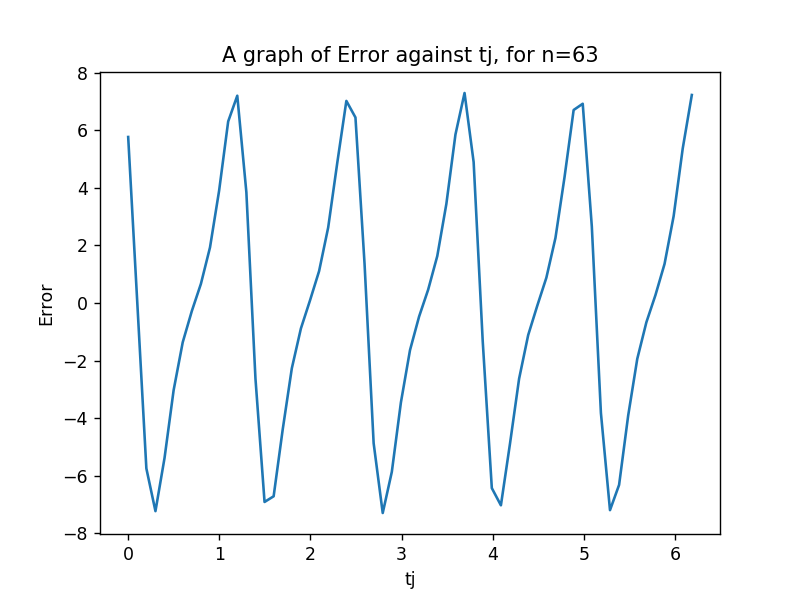

In [6]:
figure(1)
plot(tj6,Error63)
title('A graph of Error against tj, for n=63')
ylabel('Error')
xlabel('tj')
show()

<IPython.core.display.Javascript object>


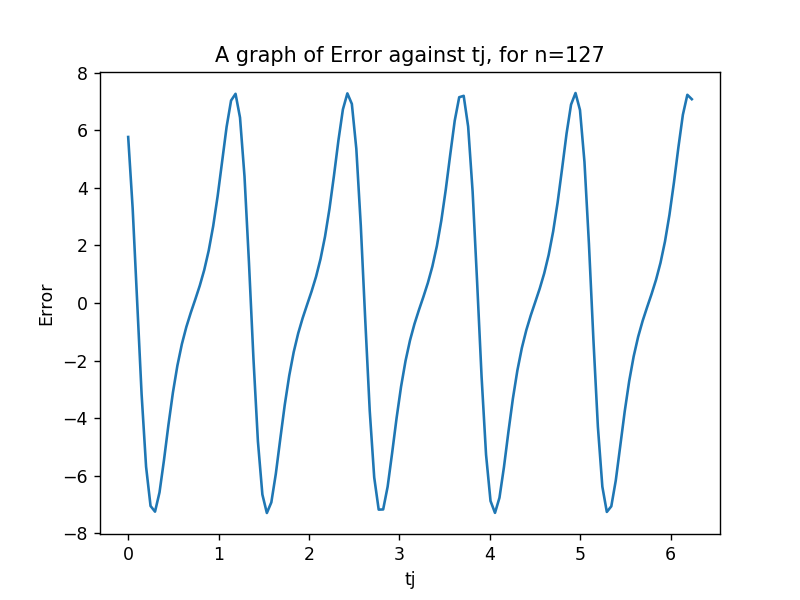

In [7]:
figure(2)
plot(tj1,Error127)
title('A graph of Error against tj, for n=127')
ylabel('Error')
xlabel('tj')
show()

# c)

# Computing the approximte Derivative

In [8]:
def uapp(uj,N):
    h=(2*pi)/N
    #computing N by N matrix DN
    DN=zeros((N,N))
    DN[N-1,N-2]=-1
    DN[N-1,0]=1
    for j in range(0,N-1):
        DN[j,j]=0
        DN[j,j-1]=-1
        DN[j,j+1]=1
    DN1=(1/(2*h))*DN
    #computing DN*uj'
    up=matmul(DN1,transpose(uj))
    return(up)

In [9]:
#for N=63
N=63
uapp6=uapp(uj6,N=63)
print('Approximate derivative of uj, for N=63; \n',uapp6,'\n')

#for N=127
N=127
uapp1=uapp(uj1,N=127)
print('Approximate derivative of uj, for N=127; \n',uapp1)

#error
#for N=63
uexact6=up(tj6)
Error6=uexact6-uapp6

#for N=127
uexact1=up(tj1)
Error1=uexact1-uapp1

Approximate derivative of uj, for N=63; 
 [ 5.01250784  0.01540083 -4.99317052 -6.66339618 -5.30770166 -3.14863042
 -1.46149004 -0.30287277  0.71881508  2.0499095   3.98021027  6.06030942
  6.46601939  3.29546465 -2.23621873 -6.13047339 -6.36116917 -4.43375793
 -2.3955685  -0.95303551  0.096774    1.19076568  2.74915002  4.86487851
  6.5620818   5.65627971  1.1596331  -4.19656497 -6.63318923 -5.71126031
 -3.56112532 -1.74772102 -0.50920268  0.50357729  1.73974945  3.54982155
  5.70096962  6.63580421  4.21968362 -1.12935048 -5.64109289 -6.56625587
 -4.87664041 -2.75922485 -1.19754851 -0.10210447  0.94672966  2.38620215
  4.42186932  6.35439095  6.14135661  2.26497653 -3.26914372 -6.45938719
 -6.06912208 -3.99192094 -2.05856394 -0.72473361  0.29744382  1.45414808
  3.13789248  5.2964482   6.662374  ] 

Approximate derivative of uj, for N=127; 
 [ 5.56900399  3.16495835  0.06865415 -3.04322287 -5.48747285 -6.84974493
 -7.09855327 -6.50149364 -5.44013237 -4.24873205 -3.13945557 -2.204089
 

<IPython.core.display.Javascript object>


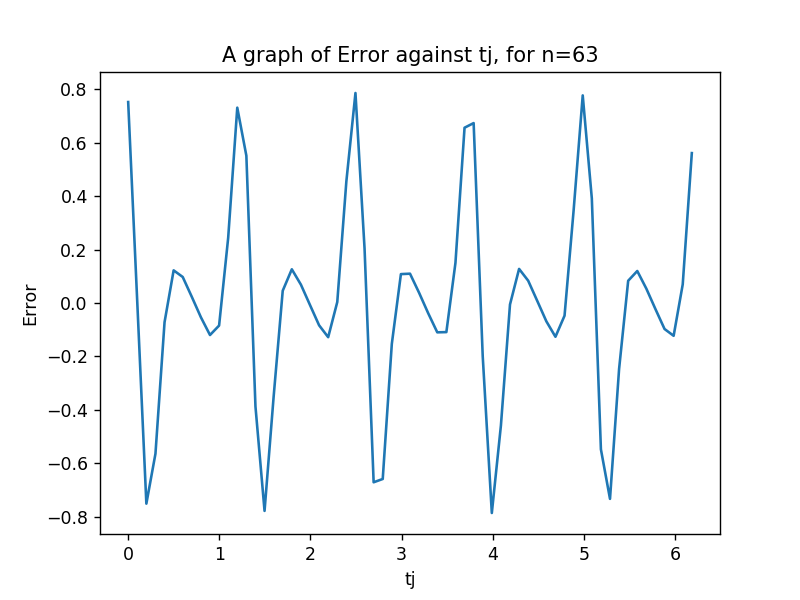

In [10]:
figure(3)
plot(tj6,Error6)
title('A graph of Error against tj, for n=63')
ylabel('Error')
xlabel('tj')
show()

<IPython.core.display.Javascript object>


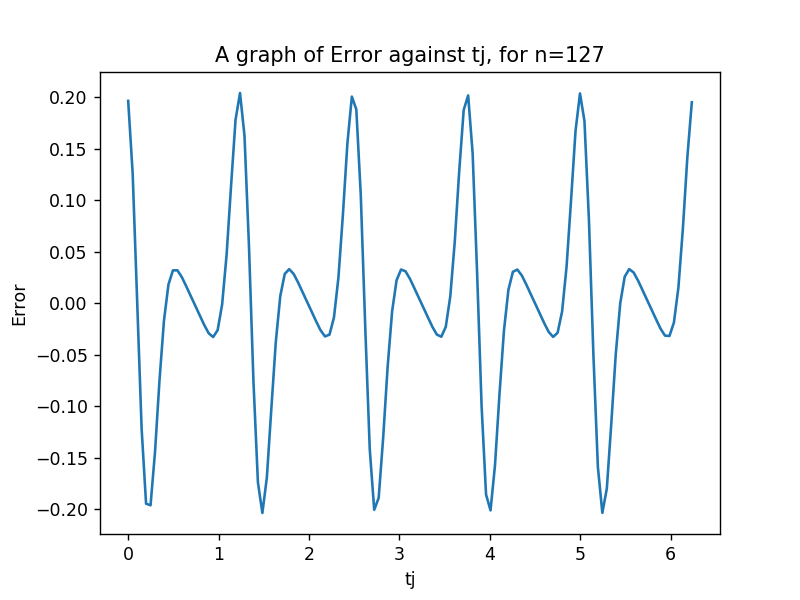

In [11]:
figure(4)
plot(tj1,Error1)
title('A graph of Error against tj, for n=127')
ylabel('Error')
xlabel('tj')
show()

# d)

According to both results, Fourier is more accurate than the centered second order accurate difference formula, because Fourier depicts almost the actual figure for the error between the first correct derivatives and the approximated unlike the centered one. In fourier the amplitudes of the oscillations are almost the same, which nearly depicts the sunisoidal nature of the error, nearing to simple hamonic motion unlike the centered one. The amplitude of Oscillation in fourier are large to almost dividing it by 10 to obatin that in the centered approximation, meaning that the oscillations amplitude in fourier are uniform, while in centered they increase and suddenly   decrease and vice versa, making predictions difficult.

For both methods, when N is increased from 63 to 127, the curves smoothen, meaning the bigger the N the better the results. However, in fourier the amplitudes of the oscillations remain constant even if N changes, but in Centered, the amplitude Drops with increasing N, and my a big magnitude.

# 2. (Discrete convolution)

# Computing b using fft

In [12]:
N=64;sig=0.1

#functions
def a(t):
    return((1/(sig*sqrt(2*pi)))*(exp((-0.5*(t**2))/sig**2)))
def x(t):
    return(1+0.05*cos(16*t))*cos(2*t)

#computing tl
tl=zeros(N)
for l in range(N):
    tl[l]=-pi + ((2*pi*l)/N)

#compute the DFTs of a and x
acap=fft(a(tl))
xcap=fft(x(tl))

#Obtain bcap
bcap=[]
for m in range(N):
    bcap.append(acap[m]*xcap[m])
    
#Compute the inverse
bf=real(ifft(bcap))
print('b=',bf)


b= [ 1.01301958e+01  9.80119038e+00  9.08935564e+00  8.27648067e+00
  7.16313018e+00  5.58449569e+00  3.76493438e+00  1.90352083e+00
  2.34734160e-15 -1.90352083e+00 -3.76493438e+00 -5.58449569e+00
 -7.16313018e+00 -8.27648067e+00 -9.08935564e+00 -9.80119038e+00
 -1.01301958e+01 -9.80119038e+00 -9.08935564e+00 -8.27648067e+00
 -7.16313018e+00 -5.58449569e+00 -3.76493438e+00 -1.90352083e+00
 -1.63218254e-15  1.90352083e+00  3.76493438e+00  5.58449569e+00
  7.16313018e+00  8.27648067e+00  9.08935564e+00  9.80119038e+00
  1.01301958e+01  9.80119038e+00  9.08935564e+00  8.27648067e+00
  7.16313018e+00  5.58449569e+00  3.76493438e+00  1.90352083e+00
 -1.97631958e-15 -1.90352083e+00 -3.76493438e+00 -5.58449569e+00
 -7.16313018e+00 -8.27648067e+00 -9.08935564e+00 -9.80119038e+00
 -1.01301958e+01 -9.80119038e+00 -9.08935564e+00 -8.27648067e+00
 -7.16313018e+00 -5.58449569e+00 -3.76493438e+00 -1.90352083e+00
  7.75279768e-16  1.90352083e+00  3.76493438e+00  5.58449569e+00
  7.16313018e+00  8.27

# Computing b using (6)

In [13]:
from scipy.linalg import circulant
#computing the first column of A
an=a(tl)
#computing A
A=circulant(an)

N=64;tj=tl ;xj=x(tl)

#computing x
xt=transpose(xj)
#computing b
bc=matmul(A,xt)
print('b=',bc)

b= [ 1.01301958e+01  9.80119038e+00  9.08935564e+00  8.27648067e+00
  7.16313018e+00  5.58449569e+00  3.76493438e+00  1.90352083e+00
  2.42737153e-15 -1.90352083e+00 -3.76493438e+00 -5.58449569e+00
 -7.16313018e+00 -8.27648067e+00 -9.08935564e+00 -9.80119038e+00
 -1.01301958e+01 -9.80119038e+00 -9.08935564e+00 -8.27648067e+00
 -7.16313018e+00 -5.58449569e+00 -3.76493438e+00 -1.90352083e+00
 -1.87963086e-15  1.90352083e+00  3.76493438e+00  5.58449569e+00
  7.16313018e+00  8.27648067e+00  9.08935564e+00  9.80119038e+00
  1.01301958e+01  9.80119038e+00  9.08935564e+00  8.27648067e+00
  7.16313018e+00  5.58449569e+00  3.76493438e+00  1.90352083e+00
 -1.76670808e-15 -1.90352083e+00 -3.76493438e+00 -5.58449569e+00
 -7.16313018e+00 -8.27648067e+00 -9.08935564e+00 -9.80119038e+00
 -1.01301958e+01 -9.80119038e+00 -9.08935564e+00 -8.27648067e+00
 -7.16313018e+00 -5.58449569e+00 -3.76493438e+00 -1.90352083e+00
  5.78684034e-16  1.90352083e+00  3.76493438e+00  5.58449569e+00
  7.16313018e+00  8.27

In [14]:
#Difference between the computed values of b from the two methods
error=abs(bc-bf)
#computing the max-norm
max1=max(error)
print('Max-norm =', max1)

Max-norm = 3.552713678800501e-15


The max-norm is very small which implies there is almost no big difference between the two values of b, produced by the two different formulas.

# Scaling b

In [15]:
#Using fft
scale=2*pi/N
bnf=scale*bf

#Using (6)
scale=2*pi/N
bnc=scale*bc


<IPython.core.display.Javascript object>


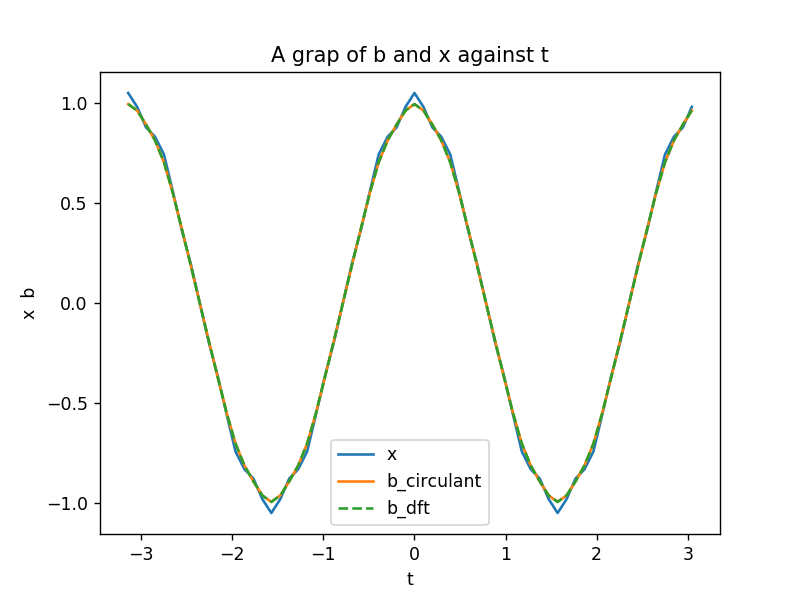

In [16]:
#ploting
figure(5)
plot(tj,xj,label='x')
plot(tj,bnc,label='b_circulant')
plot(tj,bnf,'--',label='b_dft')
title('A grap of b and x against t')
xlabel('t')
ylabel('x '' b')
legend()

show()

As from the graph above, its concluded that the scaled b is actually a smoothed version of x

# 3. (Fast solutions of trigonal linear systems)

# d)

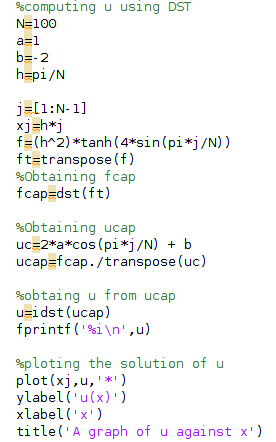

In [17]:
from PIL import Image, ImageDraw, ImageFilter

im = Image.open('/home/brian/Documents/Ph.D./fall_2020/Math_567/homework/hmk2/no.3.png')
im

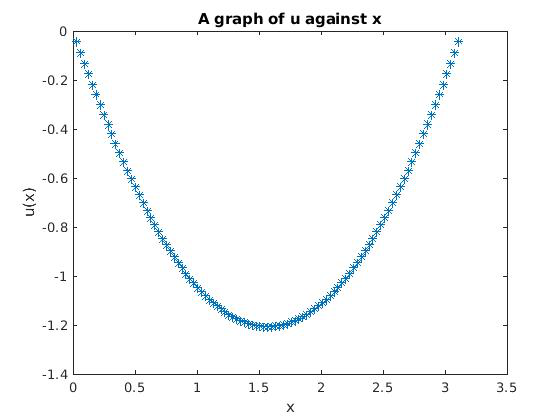

In [18]:
from PIL import Image, ImageDraw, ImageFilter

im = Image.open('/home/brian/Documents/Ph.D./fall_2020/Math_567/homework/hmk2/q3.jpg')
im

# 4. (Implicit FD methods)

# b) Finest grid

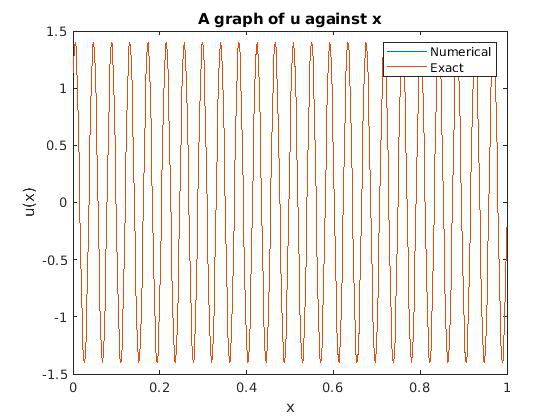

In [20]:
from PIL import Image, ImageDraw, ImageFilter

im = Image.open('/home/brian/Documents/Ph.D./fall_2020/Math_567/homework/hmk2/4b.jpg')
im

# Relative two-norm

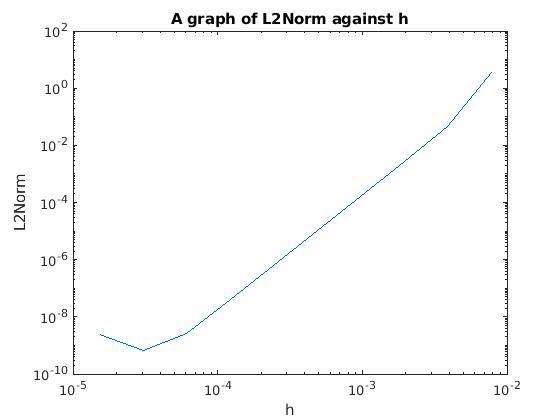

In [22]:
from PIL import Image, ImageDraw, ImageFilter

im = Image.open('/home/brian/Documents/Ph.D./fall_2020/Math_567/homework/hmk2/L2N.jpg')
im